In [19]:
from google.colab import files


uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


Importing Relevant Libraries

In [17]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [20]:
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [21]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [22]:
train_data.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


***Features of the data as I understand.***

person_age: Age of the applicant.

*person_income:* Annual income of the applicant.

*person_home_ownership:* Status of home ownership.

*person_emp_length:* Length of employment in years.

*loan_intent:* What the loan will be used for.

*loan_grade:* Loans are rated from A to G based on risk. Higher grades (A-B) have lower risk, lower returns, and lower interest rates. Lower grades (C-G) have higher risk, higher returns, and higher interest rates.

*loan_amnt:* The loan amount the applicant is requesting.

*loan_int_rate:* Interest rate on the loan.

*loan_percent_income:* The percentage of income the loan amount represents.


*cb_person_cred_default_on_file:* Credit history length of the applicant.

*cb_person_cred_hist_length:* Credit history length of the applicant.

*Loan_status:* If the person was giving a long on not.


####Exploratory Data Analysis

We now move to the data exploration and understanding stage for the training dataset. This will help us gain some insights form the data.

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [24]:
train_data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


Now, checking for missing values

In [25]:
missing_values = train_data.isnull().sum()
print(missing_values)

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


Great, looks like there are no missing value.This is perfect for as. This means, the data collection was done properly and that we can creat our model with reliable data.

Now I am going to visualize the train data to see the distribution of the numerical features in the data.

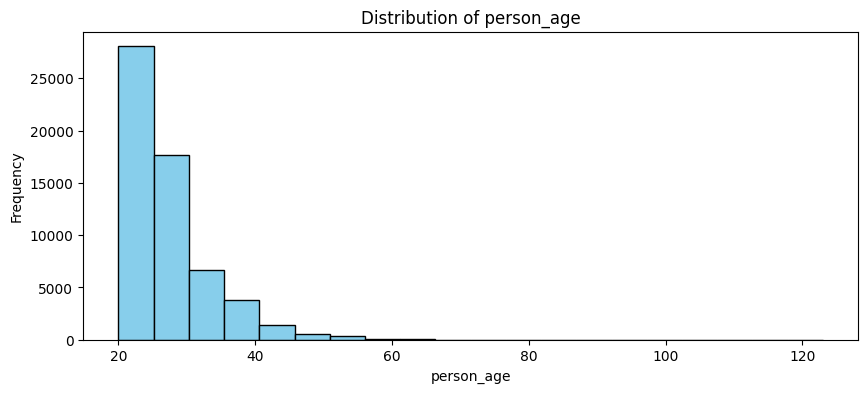

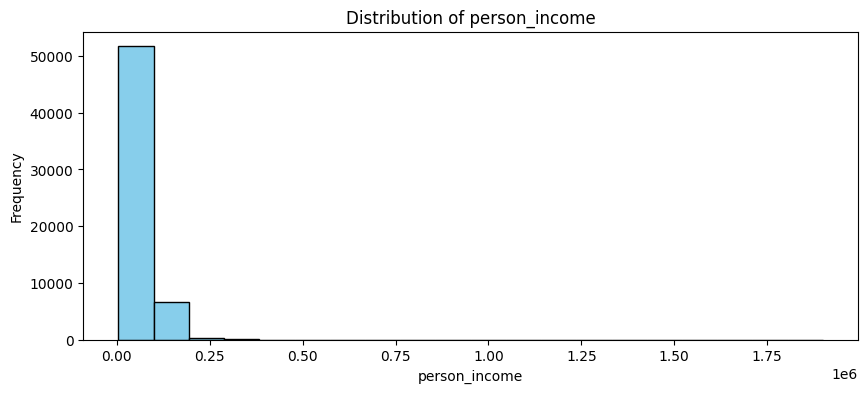

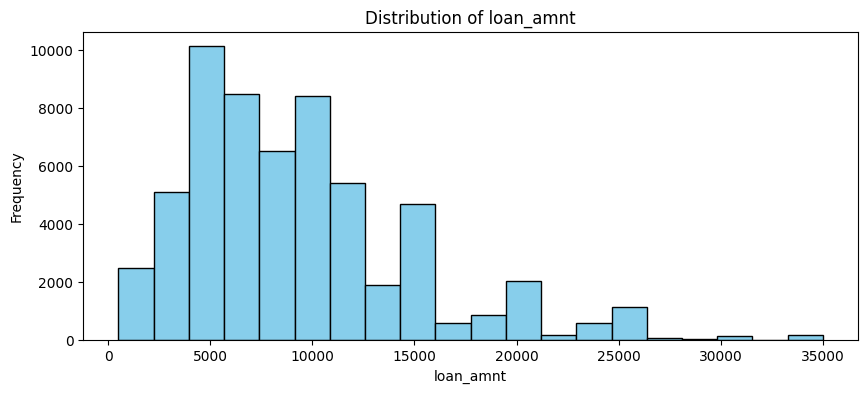

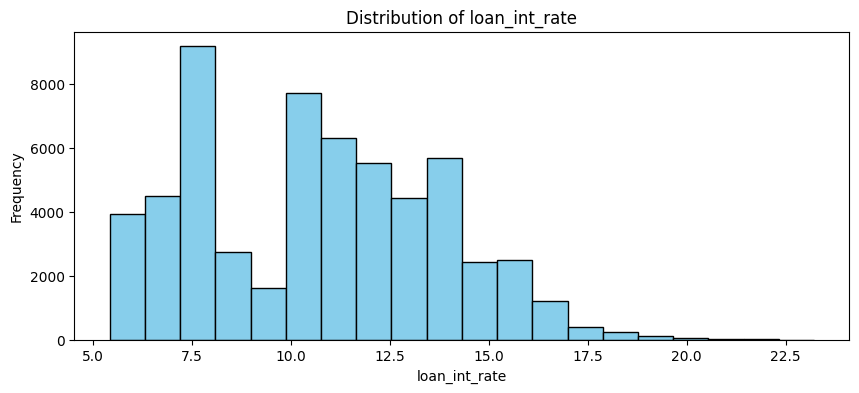

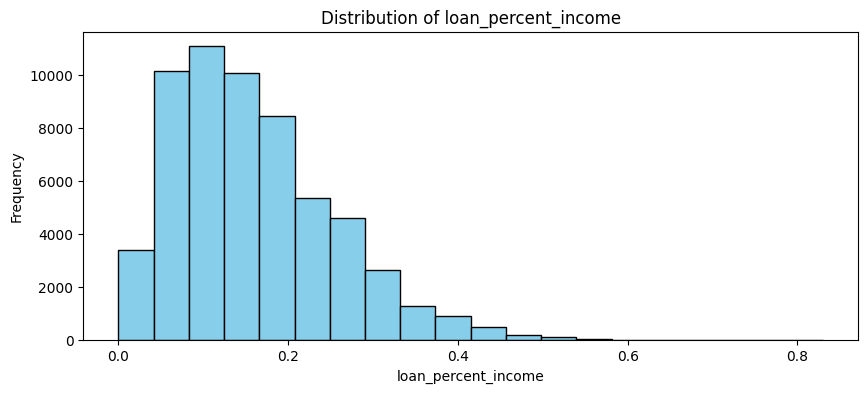

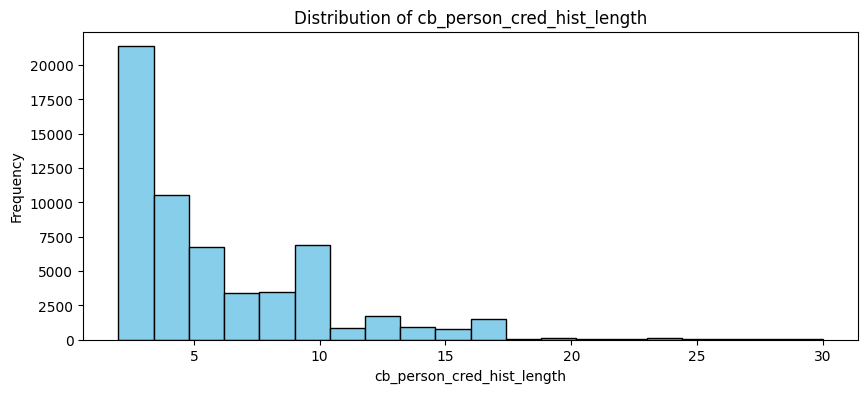

In [26]:
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for feature in numerical_features:
  plt.figure(figsize=(10,4))
  plt.hist(train_data[feature], bins=20, color='skyblue', edgecolor='black')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

These graphs show the distributions of the various numerical data.

Now lets do a boxplot for outlier detection.

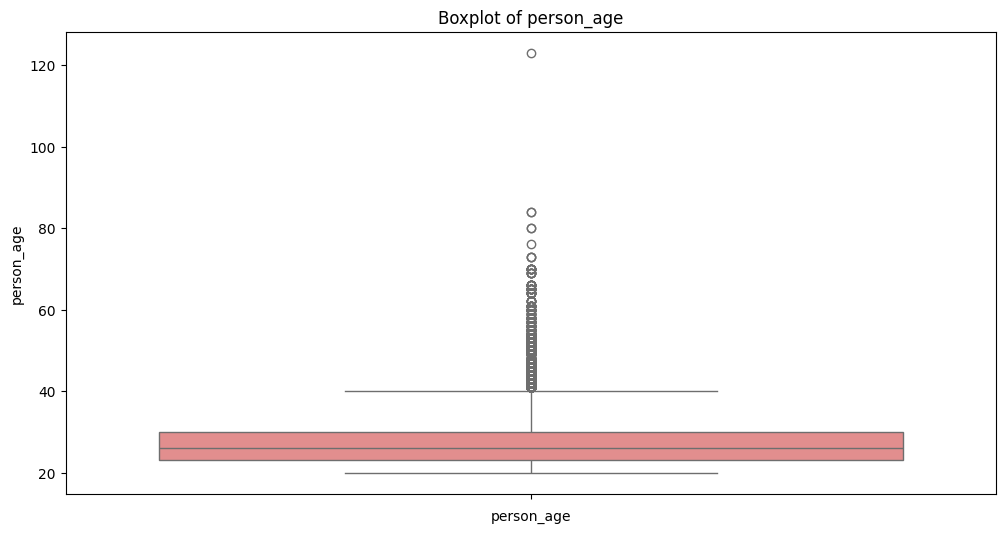

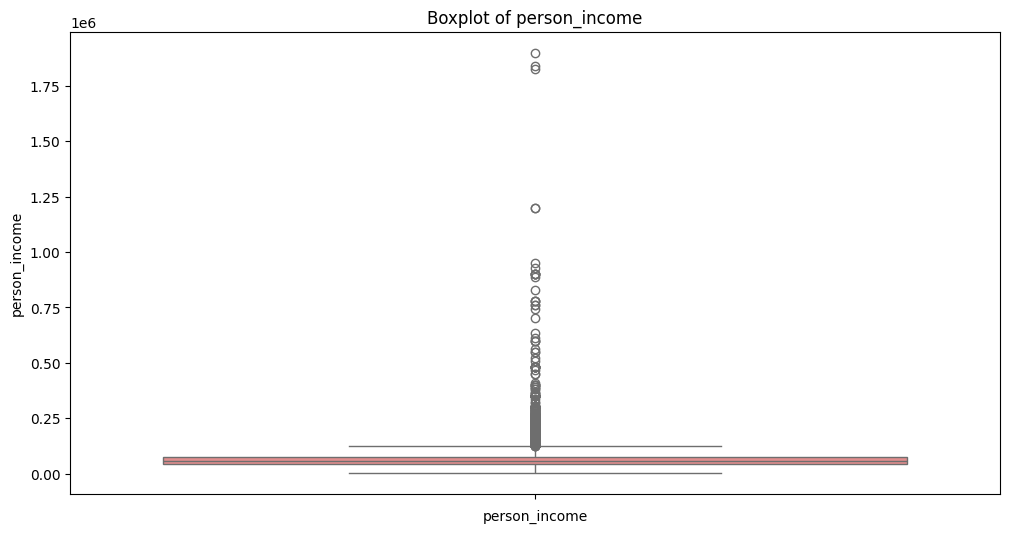

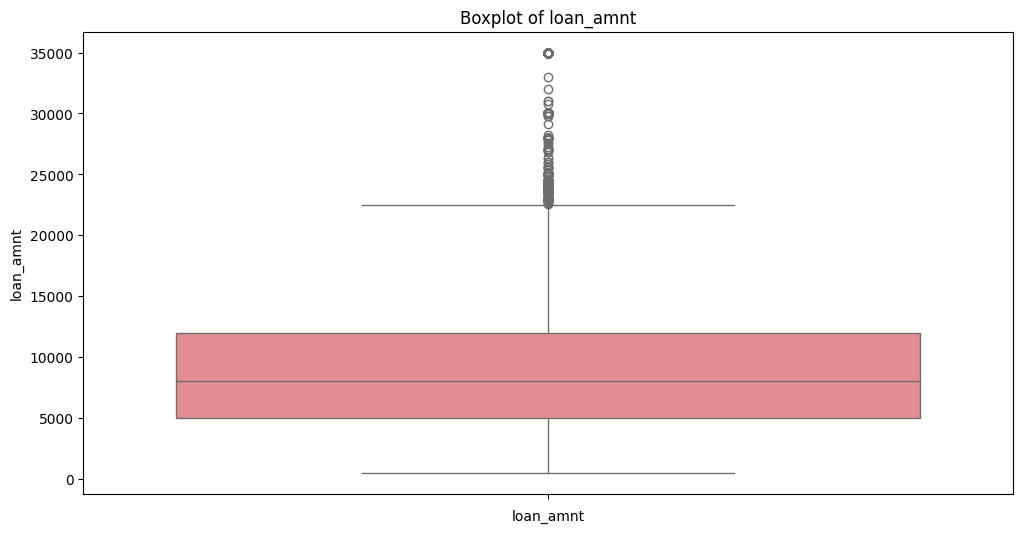

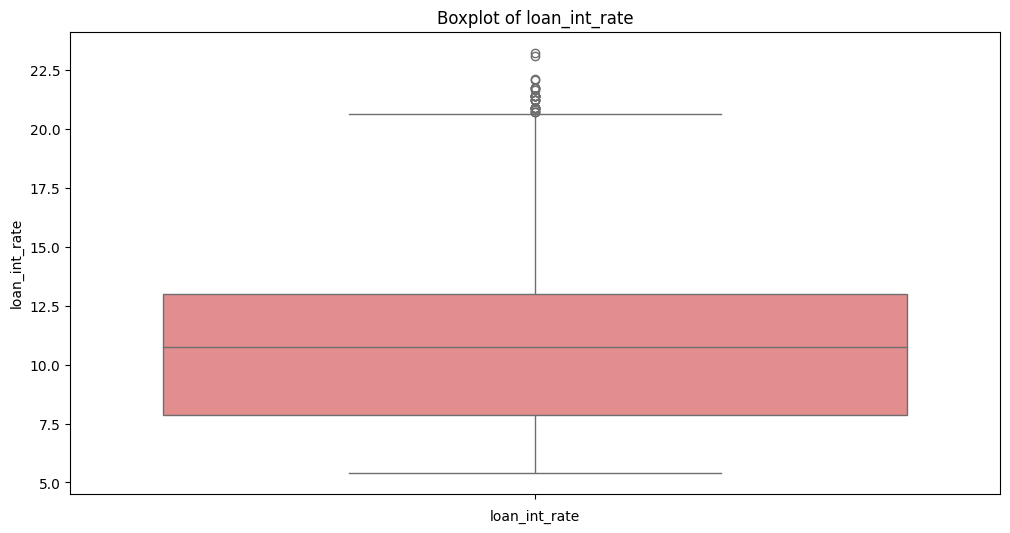

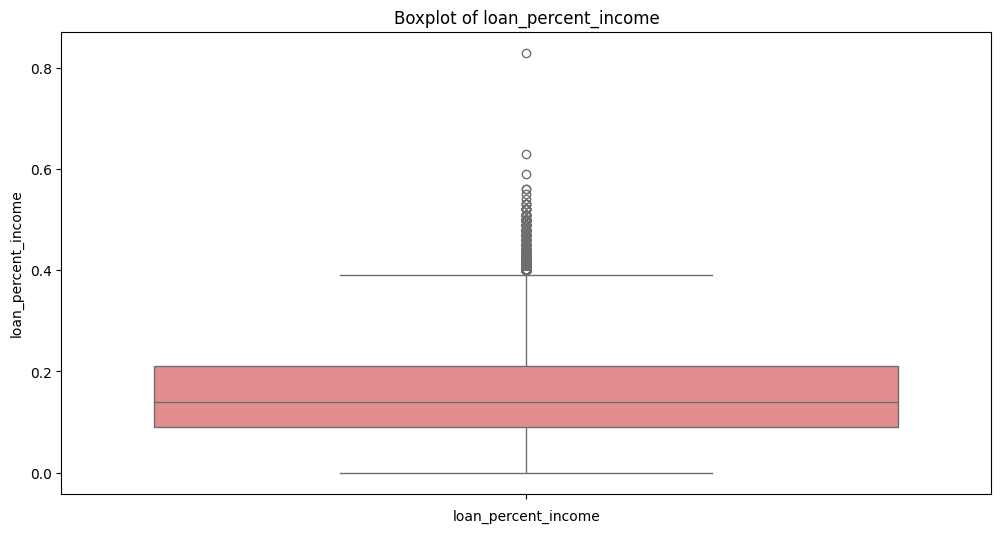

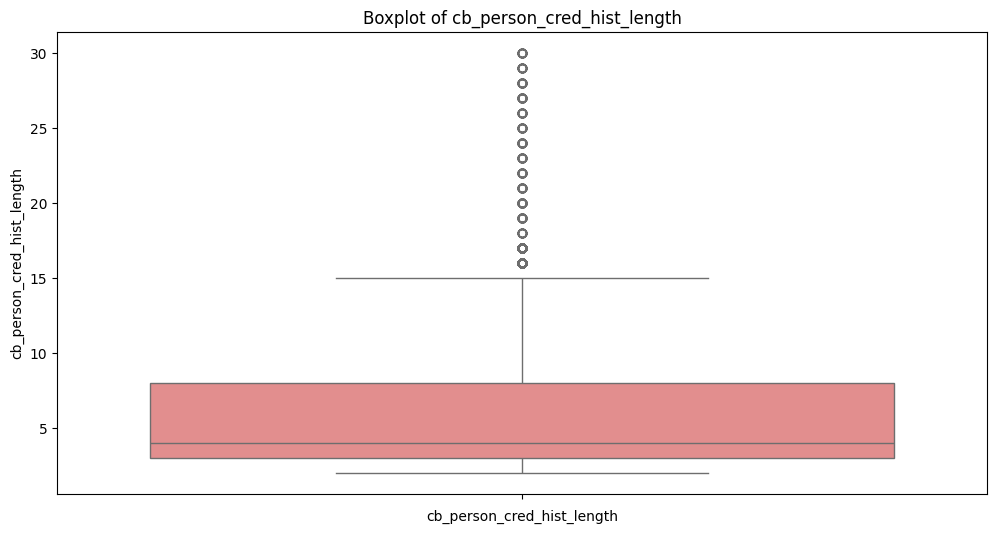

In [27]:
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(train_data[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

Lookslike we have some outliers in numerical data sets, with income of of the people being the highest.

Now lets do a Corelation Heatmap to find relationships between the features and the loan status.

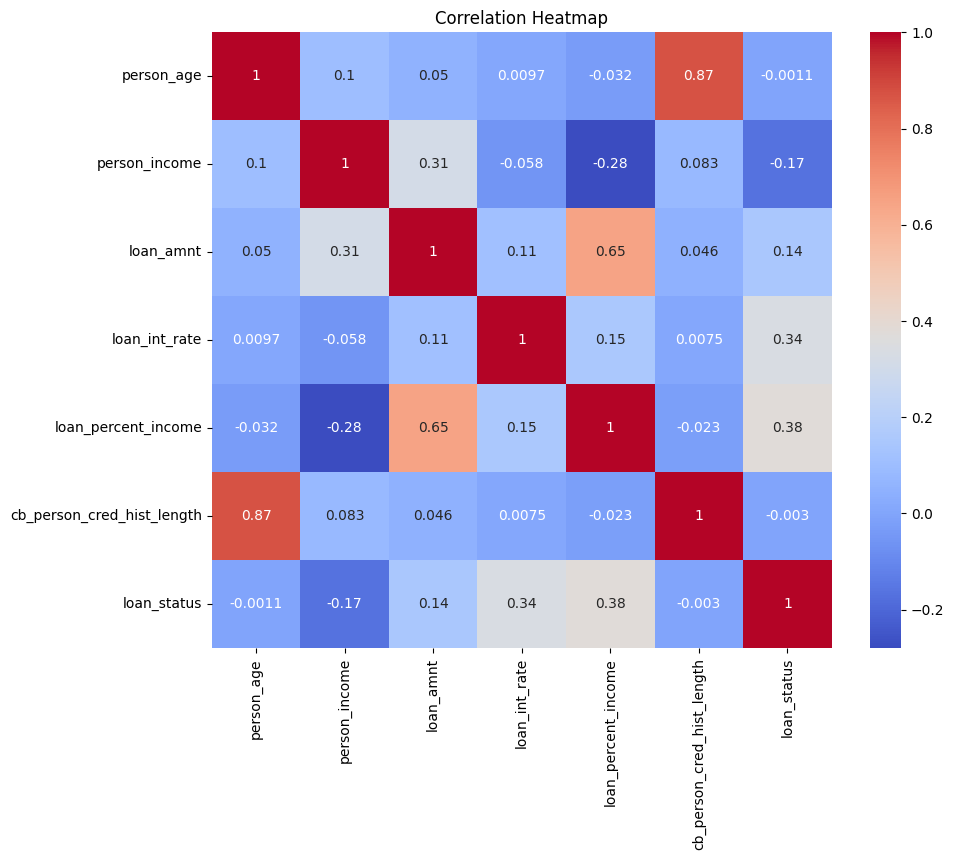

In [28]:
plt.figure(figsize=(10,8))
correlation_matrix = train_data[numerical_features + ['loan_status']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Now lets do a pairplot.

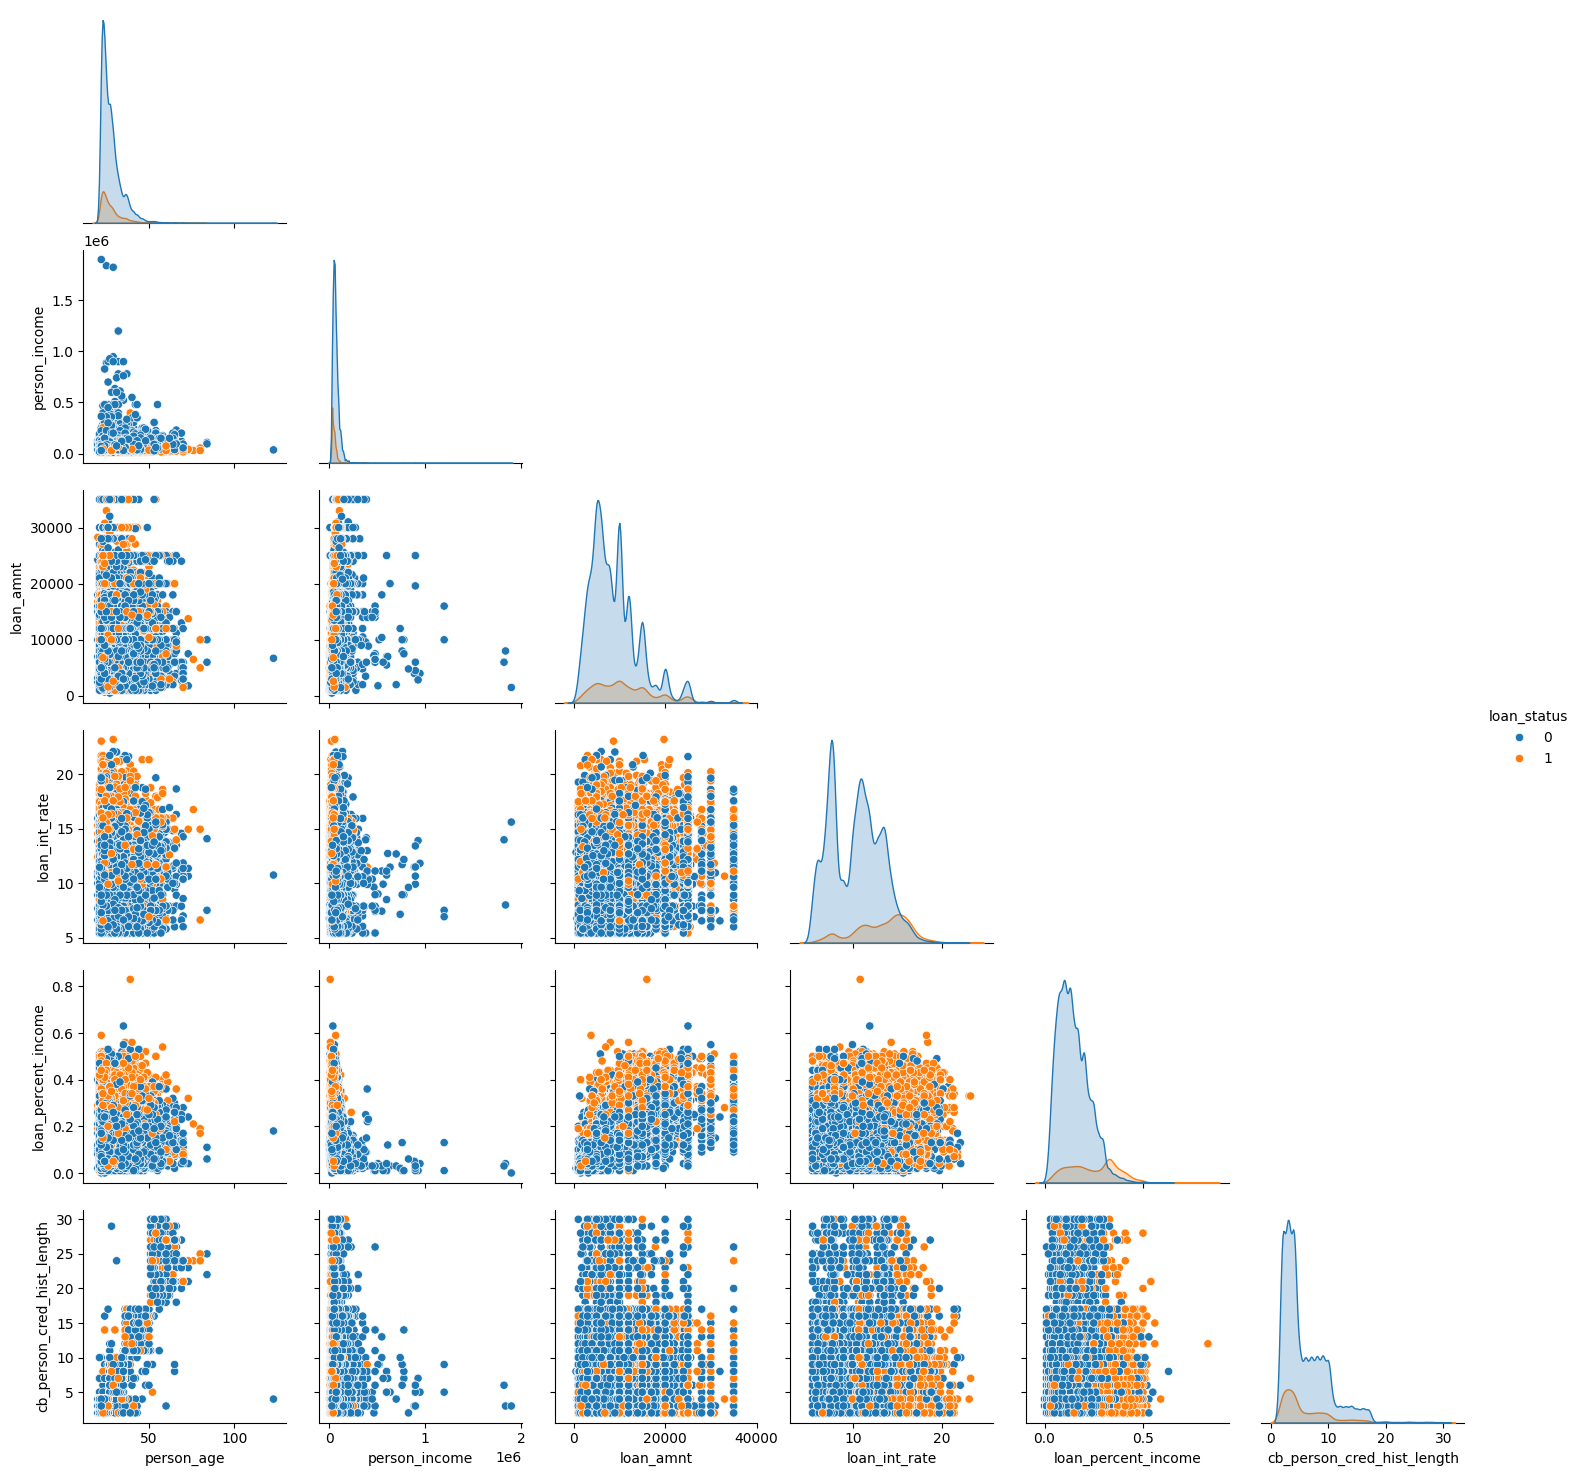

In [29]:
sns.pairplot(train_data[numerical_features + ['loan_status']], hue='loan_status', diag_kind='kde', corner=True)
plt.show()

Now bar plots for the non numerical (Categorical) Features

<ipython-input-30-564c1e68a38f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


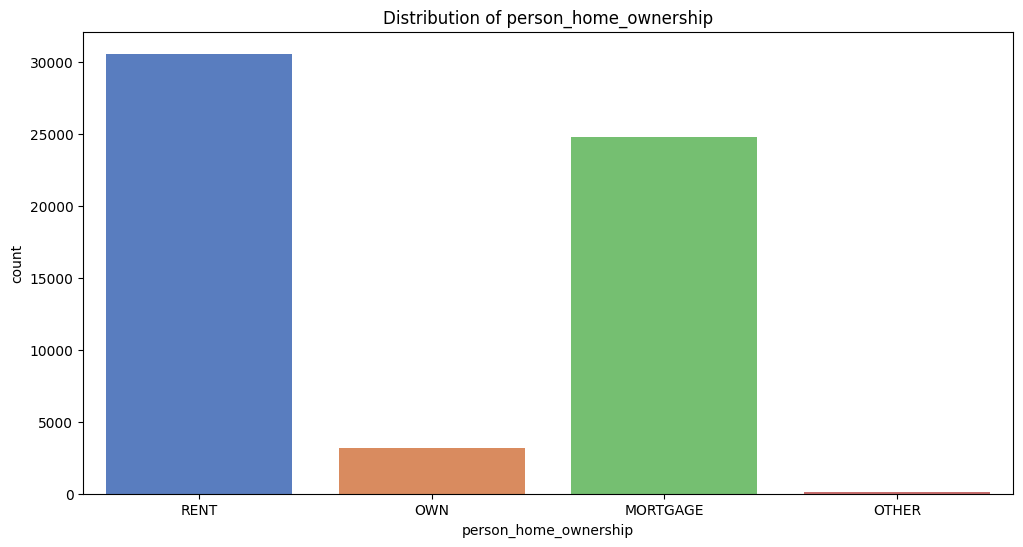

<ipython-input-30-564c1e68a38f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


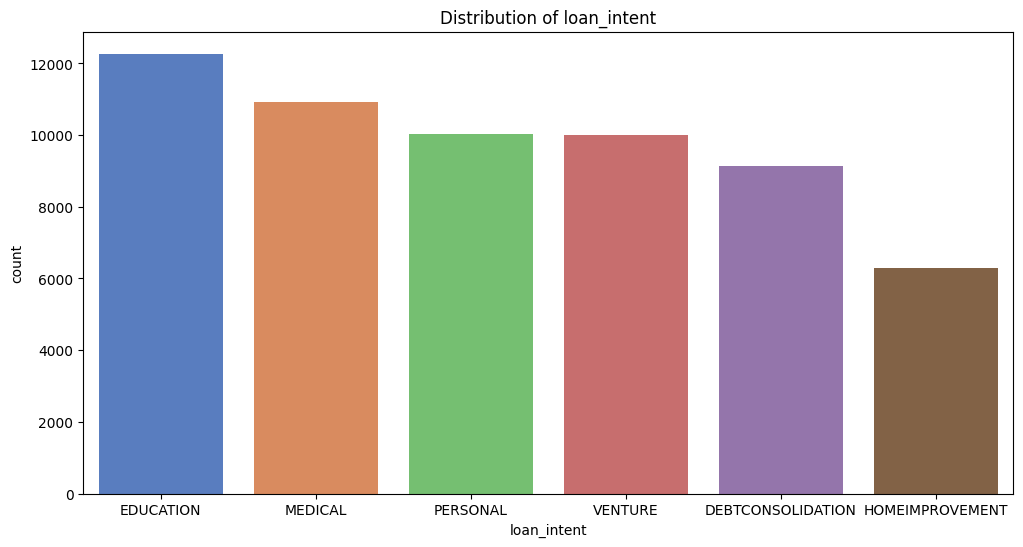

<ipython-input-30-564c1e68a38f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


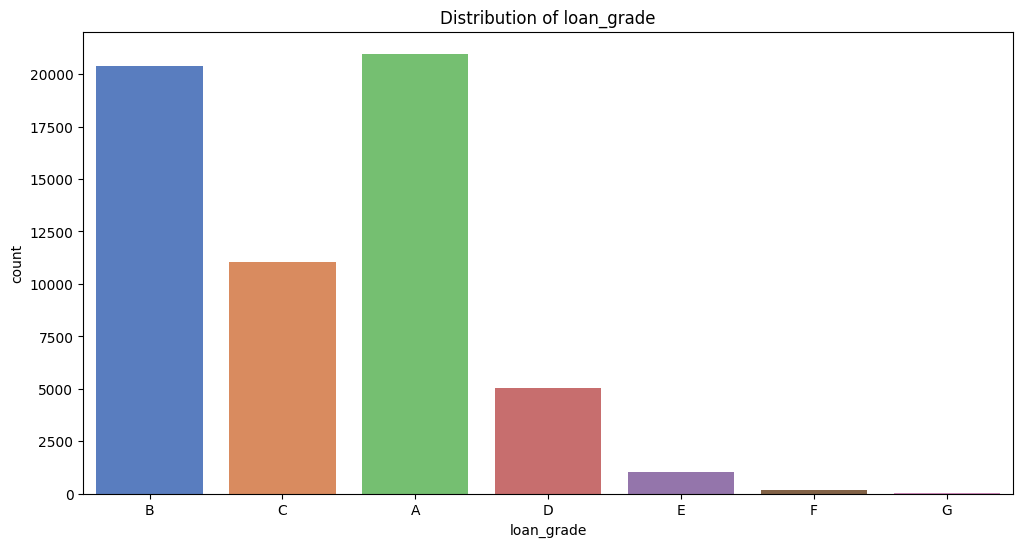

<ipython-input-30-564c1e68a38f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


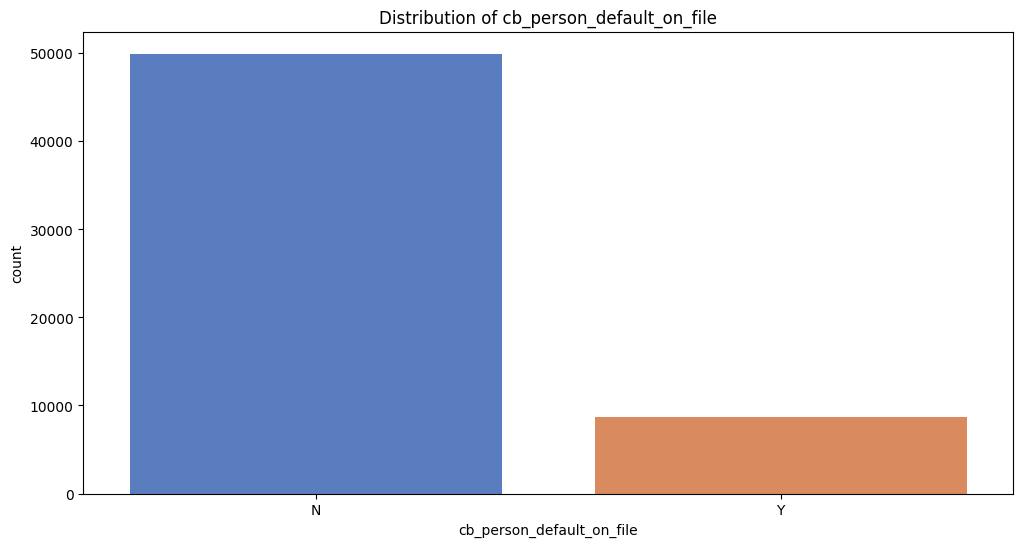

In [30]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=train_data[feature], palette='muted')
    plt.title(f'Distribution of {feature}')
    plt.show()

Now that we have some insights from the data, we need to prepare and process the data for our machine leanrning models.

####Data Preprocessing Steps

Encoding the non numerical (categorical) feautures. Machine learning models cannot work directly with categorical data, so we need to convert them into numerical representations

We are going to use one-hot encoding to create a binary column for person_home_ownership, loan_intent,cb_person_default_on_file. This is because, one-hot encoding is good for features that do not have natural ordinal relationships between categories.

We are then going to use label encoding for loan_grade, because it has a natural order.

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data_encoded = train_data.copy()

numeric_columns = train_data_encoded.select_dtypes(include=['number']).columns

train_data_encoded[numeric_columns] = train_data_encoded[numeric_columns].astype(int)

train_data_encoded = train_data_encoded.replace({True: 1, False: 0})

train_data_encoded['cb_person_default_on_file'] = train_data_encoded['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

one_hot_columns = ['person_home_ownership', 'loan_intent']
train_data_encoded = pd.get_dummies(train_data_encoded, columns=one_hot_columns, drop_first=True)

label_encoder = LabelEncoder()
train_data_encoded['loan_grade'] = label_encoder.fit_transform(train_data_encoded['loan_grade'])

new_one_hot_cols = [col for col in train_data_encoded.columns
                   if any(ohe_col in col for ohe_col in one_hot_columns)]

train_data_encoded[new_one_hot_cols] = train_data_encoded[new_one_hot_cols].astype(int)

train_data_encoded.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,37,35000,0,1,6000,11,0,0,14,0,0,0,1,1,0,0,0,0
1,1,22,56000,6,2,4000,13,0,0,2,0,0,1,0,0,0,1,0,0
2,2,29,28800,8,0,6000,8,0,0,10,0,0,1,0,0,0,0,1,0
3,3,30,70000,14,1,12000,11,0,0,5,0,0,0,1,0,0,0,0,1
4,4,22,60000,2,0,6000,6,0,0,3,0,0,0,1,0,0,1,0,0


The person_home_ownership categories (OWN, RENT, OTHER) have been transformed into separate columns with binary values.
The loan_intent categories (EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL, VENTURE) have been similarly transformed.
Boolean conversion:
The cb_person_default_on_file feature has been properly represented as 0 or 1.
Numerical columns intact:
The numerical columns (person_age, person_income, etc.) are preserved as expected, ready for the next stages.
Now that the data has been preprocessed and encoded correctly, we can move forward to the next steps, which might involve feature scaling or building the machine learning model. How would you like to proceed?

  ## Feature Scaling
  This ensure that all the features are on the same scale since we have both larger and small numerical ranges.

Since we are working with various types of models that might benefit from scaling, I suggest we apply Standardization for the scaling

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['person_age', 'person_income', 'person_emp_length','loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])

train_data_encoded.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,1.566200,-0.765768,-1.187200,1,-0.578306,0.298034,0.0,0,2.031798,0,0,0,1,1,0,0,0,0
1,1,-0.920057,-0.212128,0.328047,2,-0.937775,0.952660,0.0,0,-0.946489,0,0,1,0,0,0,1,0,0
2,2,0.240196,-0.929223,0.833130,0,-0.578306,-0.683906,0.0,0,1.039036,0,0,1,0,0,0,0,1,0
3,3,0.405947,0.156966,2.348377,1,0.500101,0.298034,0.0,0,-0.201917,0,0,0,1,0,0,0,0,1
4,4,-0.920057,-0.106673,-0.682117,0,-0.578306,-1.338532,0.0,0,-0.698298,0,0,0,1,0,0,1,0,0


We have scaled the features to such that, they a mean of 0 and a standard deviation of 1.

Now we are ready to build our machine learning models.


### Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

X = train_data_encoded.drop(columns=['id','loan_status'])
y = train_data_encoded['loan_status']

X_train, X_val, y_train,y_val = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_val_pred = logistic_model.predict(X_val)
y_val_prob = logistic_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)

print(f'Logistic Regression - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}')

Logistic Regression - Accuracy: 0.8997, AUC: 0.8889


##Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_val_rf_pred = rf_model.predict(X_val)
y_val_rf_prob = rf_model.predict_proba(X_val)[:, 1]

rf_accuracy = accuracy_score(y_val, y_val_rf_pred)
rf_roc_auc = roc_auc_score(y_val, y_val_rf_prob)

print(f'Random Forest - Accuracy: {rf_accuracy:.4f}, AUC: {rf_roc_auc:.4f}')

Random Forest - Accuracy: 0.9482, AUC: 0.9389


###Gradient Boosting (XGBoost)

In [35]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_val_xgb_pred = xgb_model.predict(X_val)
y_val_xgb_prob = xgb_model.predict_proba(X_val)[:, 1]

xgb_accuracy = accuracy_score(y_val, y_val_xgb_pred)
xgb_roc_auc = roc_auc_score(y_val, y_val_xgb_prob)

print(f'XGBoost - Accuracy: {xgb_accuracy:.4f}, AUC: {xgb_roc_auc:.4f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:45:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9518, AUC: 0.9550


So the models are doing pretty well. Both the Random Forest and XGBoost are doing well. With a solid accuracy.

Now let do a hyperparamenter tuning to determine the best parameters to improve the two good models

### Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01]
}

rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, scoring='roc_auc')

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, scoring='roc_auc')

print("Tuning Random Forest...")
rf_grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

print("Tuning XGBoost...")
xgb_grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Tuning XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:25:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


##Training models again

Now we need to see if the tuning got it better

In [57]:
#rf_best = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100, random_state=42)
rf_best.fit(X_train, y_train)

rf_best_predictions = rf_best.predict(X_val)
rf_best_accuracy = accuracy_score(y_val, rf_best_predictions)
rf_best_auc = roc_auc_score(y_val, rf_best.predict_proba(X_val)[:,1])

print(f"Retrained Random Forest - Accuracy: {rf_best_accuracy:.4f}, AUC: {rf_best_auc:.4f}")

xgb_best = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, random_state=42)
xgb_best.fit(X_train, y_train)

xgb_best_predictions = xgb_best.predict(X_val)
xgb_best_accuracy = accuracy_score(y_val, xgb_best_predictions)
xgb_best_auc = roc_auc_score(y_val, xgb_best.predict_proba(X_val)[:,1])

print(f"Retrained XGBoost - Accuracy: {xgb_best_accuracy:.4f}, AUC: {xgb_best_auc:.4f}")

Retrained Random Forest - Accuracy: 0.9398, AUC: 0.9363
Retrained XGBoost - Accuracy: 0.9505, AUC: 0.9541


Looks like the tuning didn't really make it better. Since the tuned XGBoost model didn't significantly improve performance, we'll revert to the original XGBoost model for the Feature Importance Analysis.

##Feature Importance Analysis

 We will evaluate the importance of each feature in the prediction. By calculating feature importance, we can determine which factors have the greatest impact on XGBoost model predictions. This will help us better understand the key drivers behind the loan approval process and potentially refine our models by focusing on the most important features.

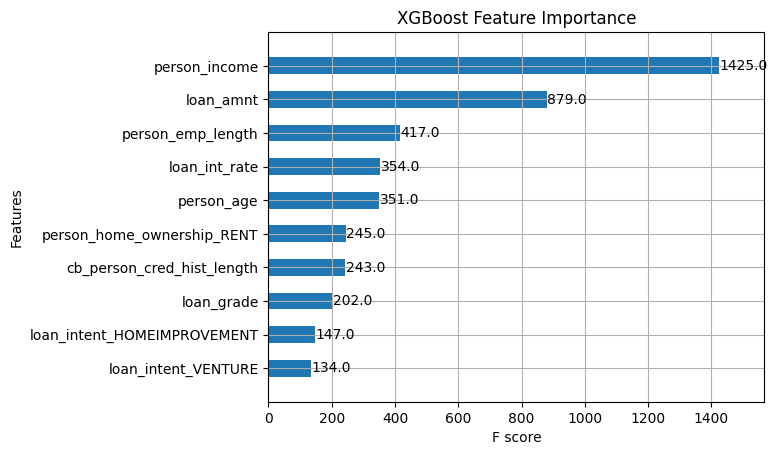

In [38]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, random_state=42)  # Create the model
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5) # Now plot_importance will work
plt.title('XGBoost Feature Importance')
plt.show()

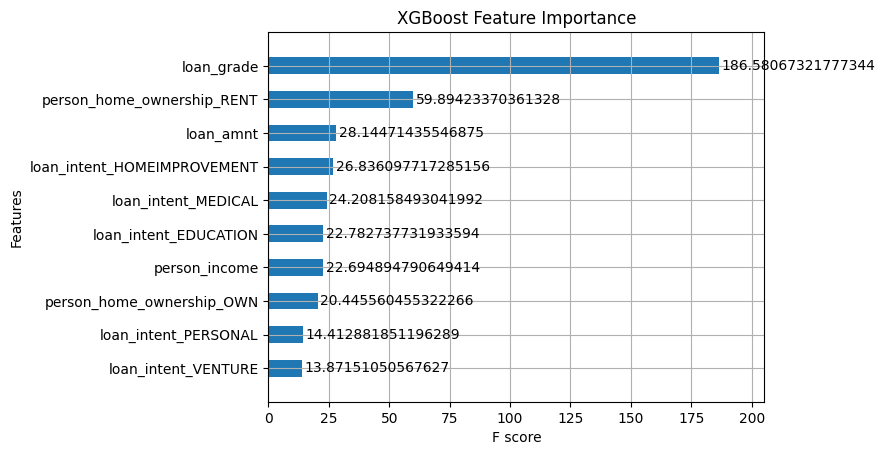

In [39]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, random_state=42)  # Create the model
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, height=0.5) # Now plot_importance will work
plt.title('XGBoost Feature Importance')
plt.show()

It shows that

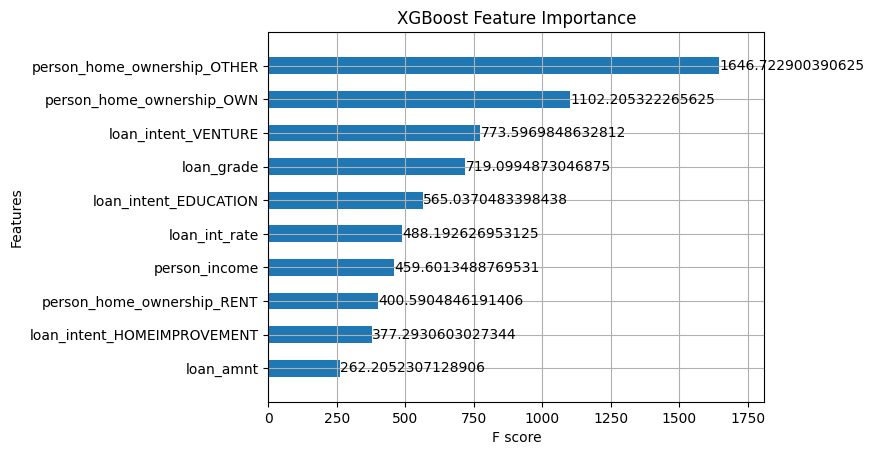

In [40]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, random_state=42)  # Create the model
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model, importance_type='cover', max_num_features=10, height=0.5) # Now plot_importance will work
plt.title('XGBoost Feature Importance')
plt.show()

###XGBoost model on unseen test_data

But first I need to process the test_data using the same preprocessing steps I applied to the train_data.

In [41]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test_data_encoded = test_data.copy()

numeric_columns = test_data_encoded.select_dtypes(include=['number']).columns

test_data_encoded[numeric_columns] = test_data_encoded[numeric_columns].astype(int)

test_data_encoded = test_data_encoded.replace({True: 1, False: 0})

test_data_encoded['cb_person_default_on_file'] = test_data_encoded['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

one_hot_columns = ['person_home_ownership', 'loan_intent']
test_data_encoded = pd.get_dummies(test_data_encoded, columns=one_hot_columns, drop_first=True)

label_encoder = LabelEncoder()
test_data_encoded['loan_grade'] = label_encoder.fit_transform(test_data_encoded['loan_grade'])

new_one_hot_cols = [col for col in test_data_encoded.columns
                   if any(ohe_col in col for ohe_col in one_hot_columns)]

test_data_encoded[new_one_hot_cols] = test_data_encoded[new_one_hot_cols].astype(int)

test_data_encoded.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,58645,23,69000,3,5,25000,15,0,0,2,0,0,1,0,1,0,0,0
1,58646,26,96000,6,2,10000,12,0,1,4,0,0,0,0,0,0,1,0
2,58647,26,30000,5,4,4000,17,0,1,2,0,0,1,0,0,0,0,1
3,58648,33,50000,4,0,7000,8,0,0,7,0,0,1,0,0,0,0,0
4,58649,26,102000,8,3,15000,16,0,1,4,0,0,0,0,1,0,0,0


Now Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['person_age', 'person_income', 'person_emp_length','loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
test_data_encoded[numerical_features] = scaler.fit_transform(test_data_encoded[numerical_features])

test_data_encoded.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,58645,-0.757007,0.130141,-0.436121,5,2.824250,1.620012,0.0,0,-0.940719,0,0,1,0,1,0,0,0
1,58646,-0.259715,0.841503,0.339404,2,0.134238,0.633599,0.0,1,-0.449573,0,0,0,0,0,0,1,0
2,58647,-0.259715,-0.897382,0.080895,4,-0.941767,2.277620,0.0,1,-0.940719,0,0,1,0,0,0,0,1
3,58648,0.900631,-0.370447,-0.177613,0,-0.403765,-0.681618,0.0,0,0.287147,0,0,1,0,0,0,0,0
4,58649,-0.259715,0.999584,0.856421,3,1.030908,1.948816,0.0,1,-0.449573,0,0,0,0,1,0,0,0


Now we are going to evaluate the model on a new dataset it has not seen before.

In [49]:
test_data_encoded = test_data_encoded.drop(columns=['id'])
# dropping 'id' beacause in the train_data_encoded, it was not present.

test_predictions = xgb_model.predict(test_data_encoded)
test_predictions_proba = xgb_model.predict_proba(test_data_encoded)[:, 1]

print("Predicted Loan Statuses (0/1):", test_predictions)
print("Predicted Probabilities:", test_predictions_proba)

Predicted Loan Statuses (0/1): [1 0 0 ... 0 0 1]
Predicted Probabilities: [0.9940527  0.02405853 0.49927524 ... 0.0478072  0.4806145  0.96861935]


# Saving in the right format for submission

In [51]:
import pandas as pd

submission = pd.DataFrame({
    'id': test_data['id'],
    'loan_status': test_predictions_proba
})


submission.to_csv('loan_status_predictions.csv', index=False)

print("Submission file 'loan_status_predictions.csv' has been saved.")

Submission file 'loan_status_predictions.csv' has been saved.


In [52]:
from google.colab import files


files.download('loan_status_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>